In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns
import datetime
import pathlib
from sklearn.model_selection import train_test_split

In [3]:
data_dir = 'bar_datasets'
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.png')))
print(f'Image Count : {image_count}')

Image Count : 95


In [4]:
durian_heatmap_dict = {
  'ripe' : list(data_dir.glob('ripe/*')),
   'unripe' : list(data_dir.glob('unripe/*')),
}

durian_labels_dict = {
    'ripe' : 0,
    'unripe' : 1
}
# print(f'Some the files : {durian_heatmap_dict['ripe'][:5]}')

In [5]:
str(durian_heatmap_dict['ripe'][0])

'bar_datasets\\ripe\\n_1 matang 1_value.png'

In [6]:
X, y = [], []


output_folder = "resized_images"

for durian_ripeness, images in durian_heatmap_dict.items():
    for index, image in enumerate(images):
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(200,200))
        X.append(resized_img)
        y.append(durian_labels_dict[durian_ripeness])
        
        # Uncomment if you want to check all the resized images
        # output_name = f"{durian_ripeness}_{index}.jpg"
        # output_path = os.path.join(output_folder, output_name)
        # cv2.imwrite(output_path, resized_img)

In [17]:
X = np.array(X)
y = np.array(y)

# Initial split to get training + validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Secondary split to get training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Normalize the pixel values
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [8]:
convDim = 5
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (convDim,convDim), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (convDim,convDim), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 47, 47, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 70688)             0         
                                                                 
 dense (Dense)               (None, 8)                 5

In [9]:
EPOCH = 25
model_fit = model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val, y_val)) 

Epoch 1/25
2/2 [==============================] - 4s 1s/step - loss: 2.0120 - accuracy: 0.5263 - val_loss: 0.8825 - val_accuracy: 0.5789
Epoch 2/25
2/2 [==============================] - 2s 1s/step - loss: 0.7798 - accuracy: 0.6140 - val_loss: 0.6931 - val_accuracy: 0.4737
Epoch 3/25
2/2 [==============================] - 3s 1s/step - loss: 0.6836 - accuracy: 0.5263 - val_loss: 0.5909 - val_accuracy: 0.5789
Epoch 4/25
2/2 [==============================] - 2s 871ms/step - loss: 0.6480 - accuracy: 0.5088 - val_loss: 0.6394 - val_accuracy: 0.8421
Epoch 5/25
2/2 [==============================] - 2s 836ms/step - loss: 0.6089 - accuracy: 0.7719 - val_loss: 0.4510 - val_accuracy: 1.0000
Epoch 6/25
2/2 [==============================] - 2s 848ms/step - loss: 0.4563 - accuracy: 0.8596 - val_loss: 0.4026 - val_accuracy: 0.5789
Epoch 7/25
2/2 [==============================] - 2s 850ms/step - loss: 0.4116 - accuracy: 0.6842 - val_loss: 0.2699 - val_accuracy: 1.0000
Epoch 8/25
2/2 [=============

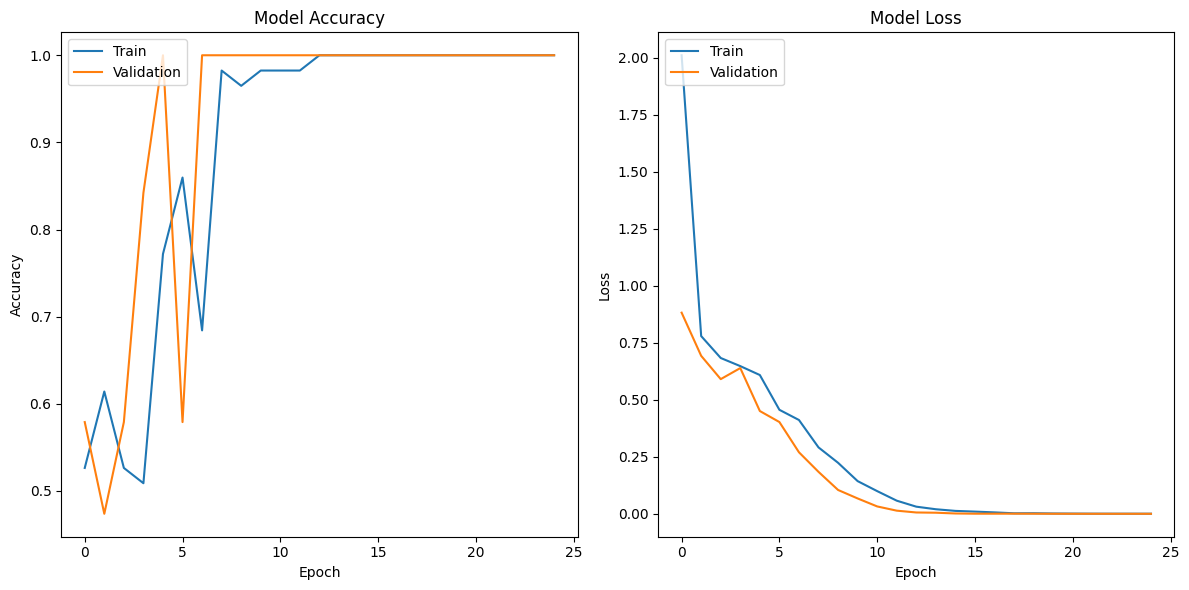

In [10]:
# Plot training and validation history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])  # Add validation accuracy
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])  # Add validation loss
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()

# save model to .keras file
now = datetime.datetime.now()
# Format the date-time string as 'MMDDYYYY-HHMM'
date_time_str = now.strftime("%d%m%Y-%H%M%S")
oke = date_time_str

plt.savefig(f"hasil training/{oke}.png")

plt.show()

In [11]:
predictions = model.predict(X_test)
predictions = np.round(predictions,2)
predictions

1/1 [==============================] - 0s 165ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [12]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(f'Model Accuracy: {test_acc}')

1/1 - 0s - loss: 9.9456e-06 - accuracy: 1.0000 - 97ms/epoch - 97ms/step
Model Accuracy: 1.0


In [12]:
# model = tf.keras.models.load_model('saved_model/28042024-182139.keras')

1/1 [==============================] - 0s 89ms/step


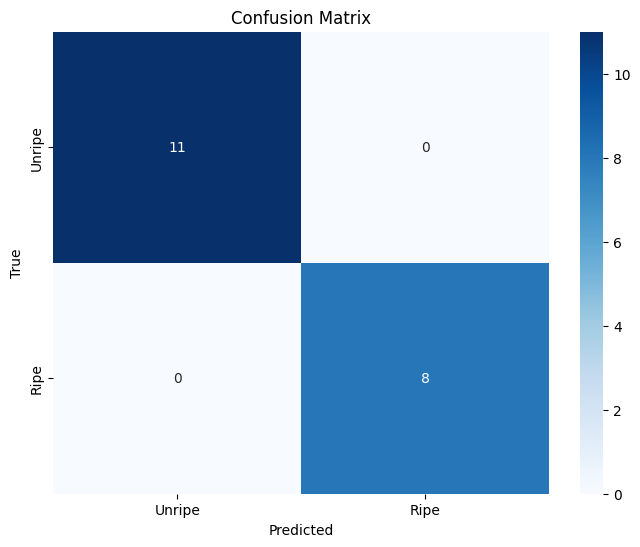

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [13]:
# Generate predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Assuming it's a binary classification problem

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Unripe', 'Ripe'], yticklabels=['Unripe', 'Ripe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
y_test

In [14]:
# save model to .keras file
now = datetime.datetime.now()
# Format the date-time string as 'MMDDYYYY-HHMM'
date_time_str = now.strftime("%d%m%Y-%H%M%S")
oke = date_time_str

In [15]:
# model.save(f"{oke}.keras")